In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1:

Consider a linear inverse problem
$$
Ku = f^{\delta},
$$
with $f^{\delta} = K\overline u + \epsilon$, where $\epsilon$ is drawn from a normal distributed with zero mean and covariance $\Sigma_{\text{noise}}$ and $\overline u$ is drawn from a normal distributed with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$.

Show that the posterior distribution is Gaussian with mean
$$
\mu_{\text{post}} = \mu_{\text{prior}} + \left(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1}\right)^{-1}K^T\Sigma_{\text{noise}}^{-1}(f - K\mu_{\text{prior}}),
$$
and covariance
$$
\Sigma_{\text{post}} = \Sigma_{\text{prior}} - \Sigma_{\text{prior}}K^T\left(K\Sigma_{\text{prior}}K^T + \Sigma_{\text{noise}}\right)^{-1}K\Sigma_{\text{prior}}.
$$
Hint: The [Binomial inverse theorem](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Binomial_inverse_theorem) may come in handy.


### Solution

We know
$$
f^\delta \sim N(Ku,\Sigma_{noise}) \\
u \sim N(\mu_{prior},\Sigma_{prior})
$$
Thus
$$
f^\delta u \sim N\Bigg(\bigg[\Sigma^{-1}_{prior}+\Sigma^{-1}_{noise}\bigg]^{-1}\Sigma_{noise}^{-1}Ku+\bigg[\Sigma^{-1}_{prior}+\Sigma^{-1}_{noise}\bigg]^{-1}\Sigma_{prior}^{-1}\mu_{prior},\bigg[\Sigma^{-1}_{prior}+\Sigma^{-1}_{noise}\bigg]^{-1}\Bigg) 
$$
Some Magic...
$$
f^\delta u \sim N\Bigg(\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}K^T\Sigma_{noise}^{-1}KKu+\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\Sigma^{-1}_{prior}\mu_{prior},\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\Bigg) 
$$
substituting $Ku=f$
$$
f^\delta u \sim N\Bigg(\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}K^T\Sigma_{noise}^{-1}Kf+\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\Sigma^{-1}_{prior}\mu_{prior},\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\Bigg) 
$$
Rewriting
$$
f^\delta u \sim N\Bigg(\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\bigg[K^T\Sigma_{noise}^{-1}Kf+\Sigma^{-1}_{prior}\mu_{prior}\bigg],\bigg[\Sigma^{-1}_{prior}+K^T\Sigma^{-1}_{noise}K\bigg]^{-1}\Bigg) 
$$


Thus
$$
\pi_{data}(f^\delta|u) = e^{\frac{1}{2}\bigg(Ku-f^\delta)^T\Sigma^{-1}_{noise}(Ku-f^\delta)\bigg)}=e^{\frac{1}{2}\|Ku-f^\delta\|^2_{\Sigma^{-1}_{noise}}}\\
\pi_{prior}(u) = e^{\frac{1}{2}\|\mu_{prior}-u\|^2_{\Sigma_{prior}}}
$$

## Exercise 2:
Consider a linear inverse problem $Ku = f^{\delta}$, where we assume that $f^{\delta}$ follows a Poisson distribution with mean $\overline f = K\overline{u}$.

* Show that the MAP estimate may be obtained by solving the following minimization problem
$$
\min_u \sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right).
$$

* Assuming that both $\|f^{\delta} - \overline f\|_2$ and $\|u-\overline u\|_2$ are small, show that the log-likelihood function may be approximated as
$$
\sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right) \approx \|Ku - f^{\delta}\|_{\Sigma^{-1}}^2,
$$
where $\Sigma$ is a diagonal matrix with elements $f_i$.

* In practice, we would replace $\overline f_i$ by $f_i^{\delta}$ for the covariance and thus approximate the Poisson map estimate as a weighted least-squares MAP estimate. Explain why this quadratic approximation makes sense heuristically.

#### First dot

For Poisson with mean $\bar{f}=K\bar{u}$ we have
$$
 \pi(u|f^\delta) = \prod^m_{i=1}\frac{(Ku)^{f^\delta_i}_i}{f^\delta_i!}e^{-(Ku)_i}
$$
The minus logarithm of this is
$$
\begin{align*}
 -\log(\pi(u|f^\delta)) &= -\log\bigg(\prod^m_{i=1}\frac{(Ku)^{f^\delta_i}_i}{f^\delta_i!}e^{-(Ku)_i}\bigg)\\
 &= -\sum^m_{i=1}\log\bigg(\frac{(Ku)^{f^\delta_i}_i}{f^\delta_i!}e^{-(Ku)_i}\bigg) \\
 &= -\sum^m_{i=1}\log\bigg(\frac{(Ku)^{f^\delta_i}_i}{f^\delta_i!}\bigg)+\log\bigg(e^{-(Ku)_i}\bigg) \\
 &= \sum^m_{i=1}(Ku)_i-\log\bigg(\frac{(Ku)^{f^\delta_i}_i}{f^\delta_i!}\bigg) \\
 &= \sum^m_{i=1}(Ku)_i-f^\delta_i\log\bigg(\frac{(Ku)_i}{f^\delta_i!}\bigg) \\
 &= \sum^m_{i=1}(Ku)_i-f^\delta_i\log\bigg((Ku)_i\bigg)+f^\delta_i\log\bigg(f^\delta_i!\bigg) \\
\end{align*}
$$
Hence the MAT estimate is the solution of
$$
\min_u\sum^m_{i=1}(Ku)_i-f^\delta_i\log\bigg((Ku)_i\bigg)
$$


#### Second dot

$$
\sum^m_{i=1}(Ku)_i-f^\delta_i\log\bigg((Ku)_i\bigg)\leq\sum^m_{i=1}(Ku)_i-f^\delta_i\bigg((Ku)_i-1\bigg)\\
\approx\sum^m_{i=1}\frac{(Ku)_i}{\bar{f}_i}(Ku)_i-f^\delta_i(Ku)_i+f^\delta_i\frac{f^\delta_i}{\bar{f}_i} \\
\approx\sum^m_{i=1}(Ku)^2_i\frac{1}{\bar{f}_i} - 2\frac{1}{\bar{f}_i}(Ku)_i^T\bar{f}_i+(f_i^{\delta})^Tf_i^{\delta}\frac{1}{\bar{f}_i} \\
=\sum^m_{i=1}\bigg(Ku - f^{\delta}\bigg)_i^T\frac{1}{\bar{f}_i}\bigg(Ku - f^{\delta}\bigg)_i \\
=\bigg(Ku - f^{\delta}\bigg)^T\Sigma^{-1}\bigg(Ku - f^{\delta}\bigg) \\
=\|Ku - f^{\delta}\|_{\Sigma^{-1}}^2
$$

#### Third dot

## Exercise 3:
Consider the inverse problem
$$
Ku = f^{\delta},
$$
where
$$Ku(x) = \int_0^1 u(x')e^{-d(x-x')^2} \mathrm{d}x',$$
and
$$
f^{\delta} = K\overline{u} + \epsilon.
$$
Generate $\overline u \in \mathbb{R}^n$ as Gaussian random fields with mean zero and covariance
$$
\Sigma_{ij} = \exp\left(-\frac{|x_i-x_j|}{L}\right),
$$
and Gaussian noise, $\epsilon$, with zero mean and variance $\sigma$.


* For varying correlation length $L$ and noise level $\sigma$, reconstruct the images using the regularized pseudo inverse of $K$. How well can you reconstruct? You can draw samples from the multivariate normal distribution using `numpy.random.multivariate_normal`

* Compute the MAP estimate from
$$
\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2.
$$
How well can you reconstruct now?

* What happens if you use two different covariance matrices for generating and reconstructing $u$?


In [4]:
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)
    
    return K,x

In [5]:
n = 100
sigma = 1e-2
L = 1

K,x = getK(n)

C = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),C)
noise = sigma*np.random.randn(n)
f = K@u + noise

#### First dot

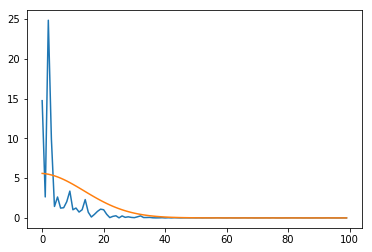

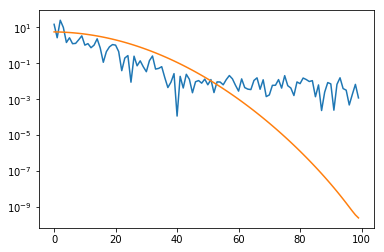

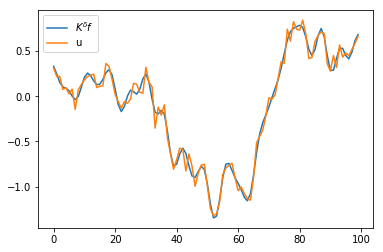

In [38]:
K_inv = np.linalg.pinv(K, rcond=0.02)
U, S, V = np.linalg.svd(K)
fourier = np.abs(np.transpose(U)@f)


plt.figure()
plt.plot(fourier)
plt.plot(S)

plt.figure()
plt.semilogy(fourier)
plt.semilogy(S)

plt.figure()
plt.plot(K_inv@f, label=r"$K^\delta f$")
plt.plot(u, label="u")
plt.legend()

plt.show()

#### Second dot

$$
\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2 \iff \frac{\partial }{\partial u}\sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2 = 0 \\
\iff \sigma^{-2}\bigg(K^TKu-2K^Tf\bigg) + 2\Sigma^{-1}u = 0
$$